# Prediction of car prices

### Problem Statement
A Chinese automobile company __Geely Auto__ aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

__The company wants to know:__ <br>
Which variables are significant in predicting the price of a car.<br>
How well those variables describe the price of a car.<br>

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. <br>

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


# Data Inspection

In [1]:
Carnames=["symboling","normalized-losses","make",                     
"fuel-type", "aspiration","num-of-doors","body-style","drive-wheels",             
"engine-location","wheel-base","length", "width","height",                   
"curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system",              
"bore","stroke","compression-ratio","horsepower","peak-rpm",                 
"city-mpg","highway-mpg","price"]               

In [2]:
Carnames

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [3]:
import pandas as pd
car=pd.read_csv(r"C:\Users\me\Downloads\imports-85.data",sep="[,]",names=Carnames)
car

<ipython-input-3-ce4a2a24ef7a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  car=pd.read_csv(r"C:\Users\me\Downloads\imports-85.data",sep="[,]",names=Carnames)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- We can observe that data have 205 rows and 26 columns.
- There are 10 numeric columns and 16 categorical columns. 
- With the first look, we can see that there are no missing values in the data.
- Price column/feature is going to be the target column or dependent feature for this project.

# Data Preparation

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
#checking for punctuation
for i in string.punctuation:
        nulls=car.astype("str")==str(i)
        print(nulls.sum(),i)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64 !
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size        

dtype: int64 >
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64 ?
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
n

- The dataset has '?' on some of the rows.

In [7]:
#Replacing ? with null
import numpy as np
nun_car=car.replace("?",np.nan)
nun_car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
#sum of null values per column
nun_car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
#percentage of null values  
nun_car.isnull().sum()*100/nun_car.shape[0]

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [10]:
#columns with null values
for i in zip(nun_car.isnull().sum(),nun_car.columns):
    if i[0]!=0:
        print(i[1])

normalized-losses
num-of-doors
bore
stroke
horsepower
peak-rpm
price


In [11]:
nun_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
#filling null values
bfill_car=nun_car.fillna(method="bfill")
bfill_car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [13]:
bfill_car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

- The dataset has no null values.

In [14]:
bfill_car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [15]:
renamed_columns=bfill_car.rename(columns={"make":"CarName",
                          "fuel-type":"fueltype",
                          "num-of-doors":"doornumber",
                          "body-style":"carbody",
                          "drive-wheels":"drivewheel",
                          "engine-location":"enginelocation",
                          "wheel-base":"wheelbase",
                          "length":"carlength",
                          "width":"carwidth",
                          "height":"carheight",
                          "curb-weight":"curbweight",
                          "engine-type":"enginetype",
                          "num-of-cylinders":"cylindernumber",
                           "engine-size":"enginesize",
                           "fuel-system":"fuelsystem",
                           "bore":"boreratio",
                           "compression-ratio":"compressionratio",
                           "peak-rpm":"peakrpm",
                           "city-mpg":"citympg",
                           "highway-mpg":"highwaympg",
                           
                           })

In [16]:
renamed_columns

,symboling,normalized-losses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [18]:
renamed_columns.to_csv("Car_Price_prediction.csv",index=False)

## Reading and Understanding Data

In [19]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
cardf = pd.read_csv(r"C:\Users\me\ML classwork\Car_Price_prediction.csv")
cardf

,symboling,normalized-losses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data Inspection

In [24]:
cardf.shape
# Data has 26 columns and 205 rows.

(205, 26)

In [25]:
cardf.describe()

,symboling,normalized-losses,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.330927,3.258049,10.142537,104.312195,5126.585366,25.219512,30.751220,13182.702439
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270973,0.314152,3.972040,39.523263,477.137141,6.542142,6.886443,7879.629265
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [26]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   CarName            205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   doornumber         205 non-null    object 
 6   carbody            205 non-null    object 
 7   drivewheel         205 non-null    object 
 8   enginelocation     205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  carlength          205 non-null    float64
 11  carwidth           205 non-null    float64
 12  carheight          205 non-null    float64
 13  curbweight         205 non-null    int64  
 14  enginetype         205 non-null    object 
 15  cylindernumber     205 non-null    object 
 16  enginesize         205 non

In [27]:
cardf.columns

Index(['symboling', 'normalized-losses', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Data Cleaning

In [28]:
# Checking Null values
cardf.isnull().sum()*100/cardf.shape[0]
# There are no NULL values in the dataset, hence it is clean.

symboling            0.0
normalized-losses    0.0
CarName              0.0
fueltype             0.0
aspiration           0.0
doornumber           0.0
carbody              0.0
drivewheel           0.0
enginelocation       0.0
wheelbase            0.0
carlength            0.0
carwidth             0.0
carheight            0.0
curbweight           0.0
enginetype           0.0
cylindernumber       0.0
enginesize           0.0
fuelsystem           0.0
boreratio            0.0
stroke               0.0
compressionratio     0.0
horsepower           0.0
peakrpm              0.0
citympg              0.0
highwaympg           0.0
price                0.0
dtype: float64

## __Exploratory Data Analysis ( EDA )__

## Univariate Analysis

### Price : Target Variable

In [30]:
cardf.price.describe()

count      205.000000
mean     13182.702439
std       7879.629265
min       5118.000000
25%       7788.000000
50%      10345.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

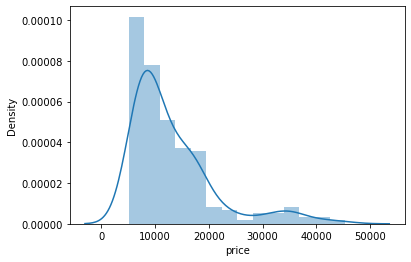

In [31]:
sns.distplot(cardf['price'])

#### Inference
- Mean and median of price are significantly different.
- Large standard deviation indicates that there is considerable variance in the prices of the automobiles.
- Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.

### Symboling

- symboling : Its assigned insurance risk rating
-             A value of +3 indicates that the auto is risky,
-             -3 that it is probably pretty safe.(Categorical)

- Let's see the count of automobile in each category and percent share of each category.

In [32]:
cardf['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

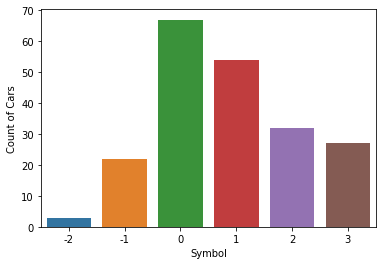

In [33]:
plt1 = sns.countplot(cardf['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()


In [34]:
df_sym = pd.DataFrame(cardf['symboling'].value_counts())
df_sym

,symboling
0,67
1,54
2,32
3,27
-1,22
-2,3


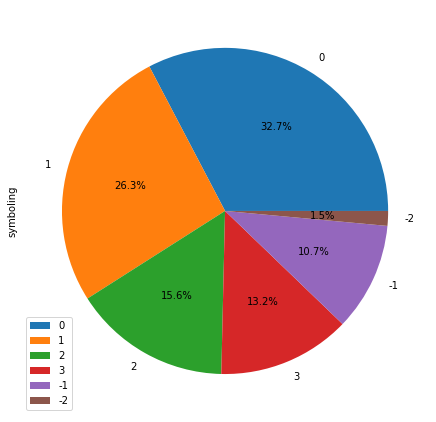

In [35]:
df_sym = pd.DataFrame(cardf['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
plt.show()


 **Let's see average price of cars in each symbol category.**

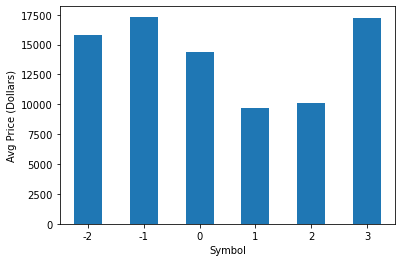

In [37]:
plt1 = cardf[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()


#### Inference
- More than 50% of cars are with symbol 0 or 1.
- Average price of car is lower for 0,1 & 2 symbol category.

### Car Name

In [38]:
cardf.CarName.values[0:50]

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar'], dtype=object)

- It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model'
- Let's split out car company to a new column.

In [39]:
cardf['brand'] = cardf.CarName.str.split(' ').str.get(0).str.upper()
cardf

,symboling,normalized-losses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,ALFA-ROMERO
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,ALFA-ROMERO
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,ALFA-ROMERO
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,AUDI
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,AUDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,VOLVO
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,VOLVO
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,VOLVO
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,VOLVO


In [40]:
#checking for number of unique car names
len(set(cardf.brand.values))

22

**Let's see companies and their no of models.**

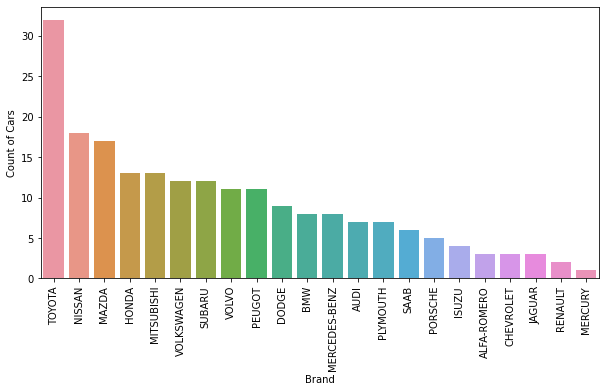

In [42]:
fig, ax = plt.subplots(figsize = (10,5))
plt1 = sns.countplot(cardf['brand'], order=pd.value_counts(cardf['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()


- It's noticed that in brand names,
- VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
- MAZDA is also spelled as MAXDA
- PORSCHE as PORSCHE and PORCSCHE.
- Let's fix these data issues.

In [43]:
cardf['brand'] = cardf['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
cardf['brand'] = cardf['brand'].replace(['MAXDA'], 'MAZDA')
cardf['brand'] = cardf['brand'].replace(['PORCSHCE'], 'PORSCHE')
cardf['brand'] = cardf['brand'].replace(['TOYOUTA'], 'TOYOTA')

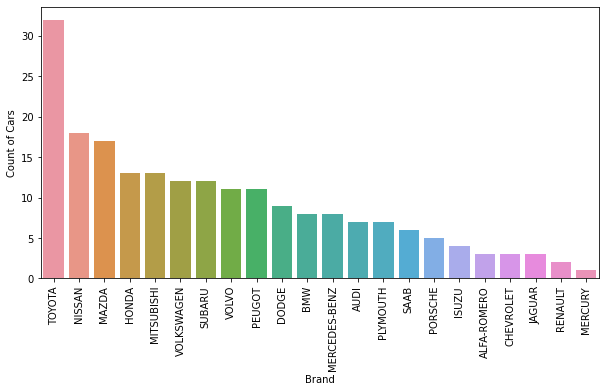

In [44]:
fig, ax = plt.subplots(figsize = (10,5))
plt1 = sns.countplot(cardf['brand'], order=pd.value_counts(cardf['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()


In [45]:
cardf.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

#### Inference
- Toyota, a Japanese company has the most no of models.

**Let's see average car price of each company.**

# Bivariant Analysis

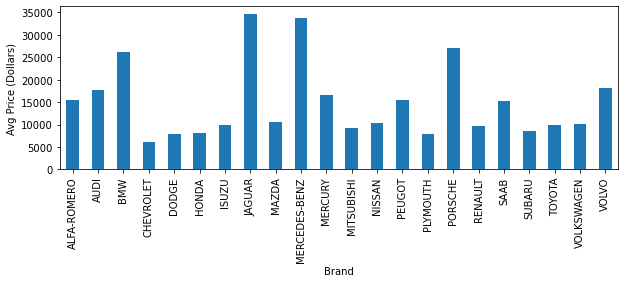

In [50]:
df_comp_avg_price = cardf[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (10,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [51]:
#df_comp_avg_price

In [54]:
cardf = cardf.merge(df_comp_avg_price, on = 'brand')

In [55]:
cardf

,symboling,normalized-losses,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,ALFA-ROMERO,15498.333333
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,ALFA-ROMERO,15498.333333
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,ALFA-ROMERO,15498.333333
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,AUDI,17655.000000
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,AUDI,17655.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,VOLVO,18063.181818
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,VOLVO,18063.181818
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,VOLVO,18063.181818
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,VOLVO,18063.181818


In [56]:
cardf['brand_category'] = cardf['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))


#### Inference:
- Toyota has considerably high no of models in the market.
- Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price.

### Fuel Type

**Let's see how price varies with  Fuel Type**

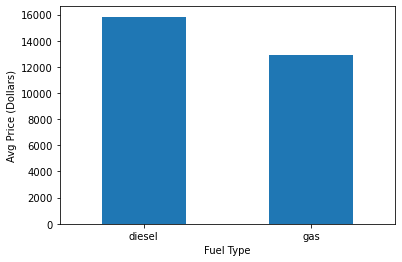

In [57]:
df_fuel_avg_price = cardf[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

#### Inference
- Diesel cars are more priced than gas cars.

### Aspiration

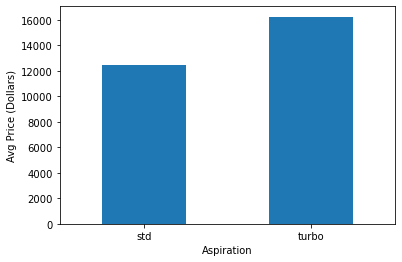

In [59]:
df_aspir_avg_price = cardf[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

#### Inference
- Cars with turbo aspiration engine are priced more than standard ones.

### Door Numbers

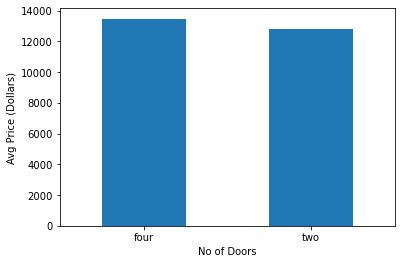

In [60]:
df_door_avg_price = cardf[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x ='doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

#### Inference
- Number of doors doesn't seem to have much effect on price.

### Car Body

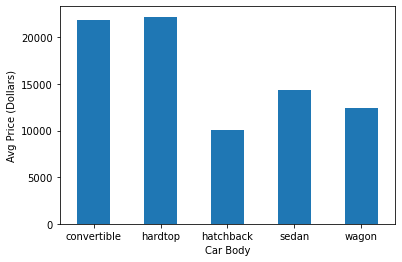

In [62]:
df_body_avg_price = cardf[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x ='carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show() 

#### Inference 
- Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

### Drivewheel

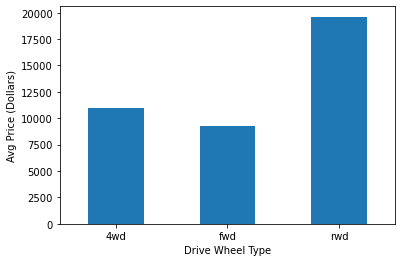

In [63]:
df_drivewheel_avg_price = cardf[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

#### Inference
- Cars with Rear wheel drive have a higher price value.

### Wheel base

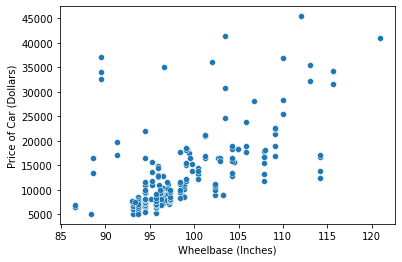

In [64]:
plt1 = sns.scatterplot(x ='wheelbase', y = 'price', data = cardf)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference
- Most cars has a wheel base around 95 inches.
- Price has a slight positive correlation with wheelbase.

## Car Dimensions

**Let's see how price varies with Car's length, width,height and weight.**

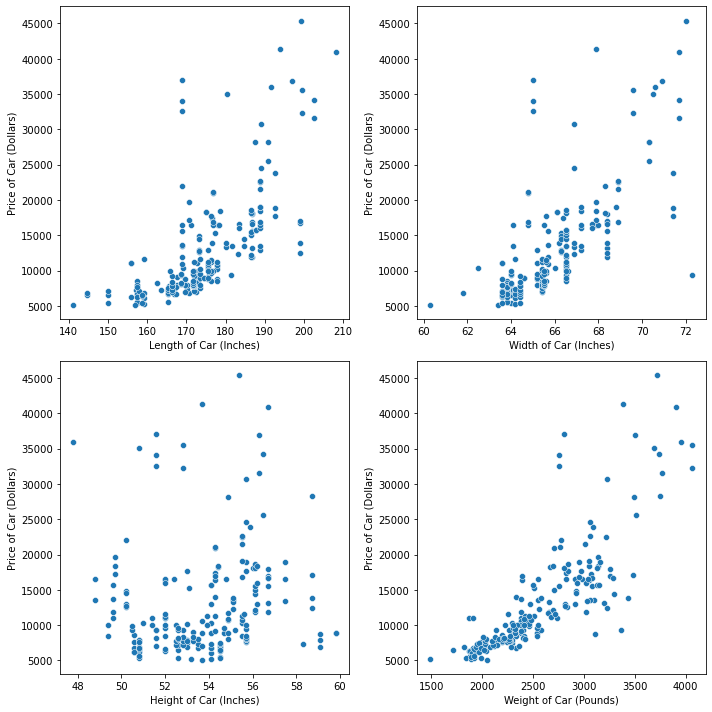

In [66]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = cardf, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = cardf, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = cardf, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = cardf, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

#### Inference
- Length, width and weight of the car is positively related with the price.
- There is not much of a correlation with Height of the car with price.

## Engine Specifications

### Engine Type, Cylinder, Fuel System

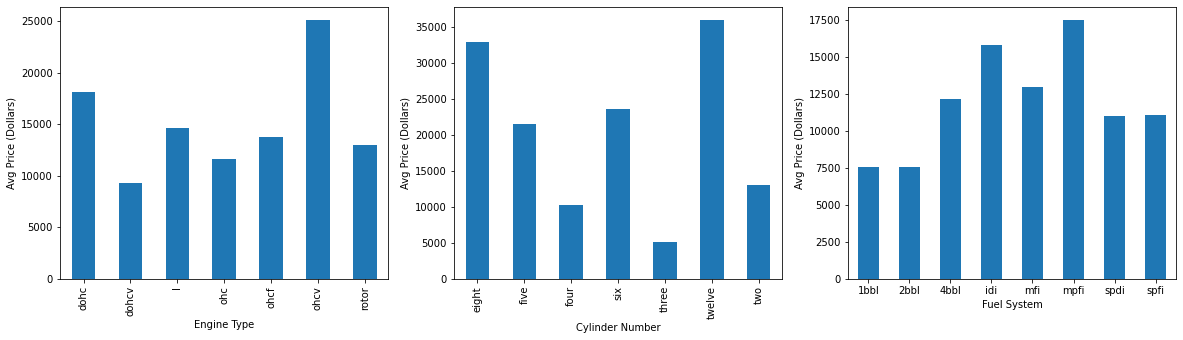

In [67]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = cardf[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
#
df_cylindernumber_avg_price = cardf[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
#
df_fuelsystem_avg_price = cardf[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

#### Inference
- DOHCV and OHCV engine types are priced high.
- Eight and twelve cylinder cars have higher price.
- IDI and MPFI fuel system have higher price.


### Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio

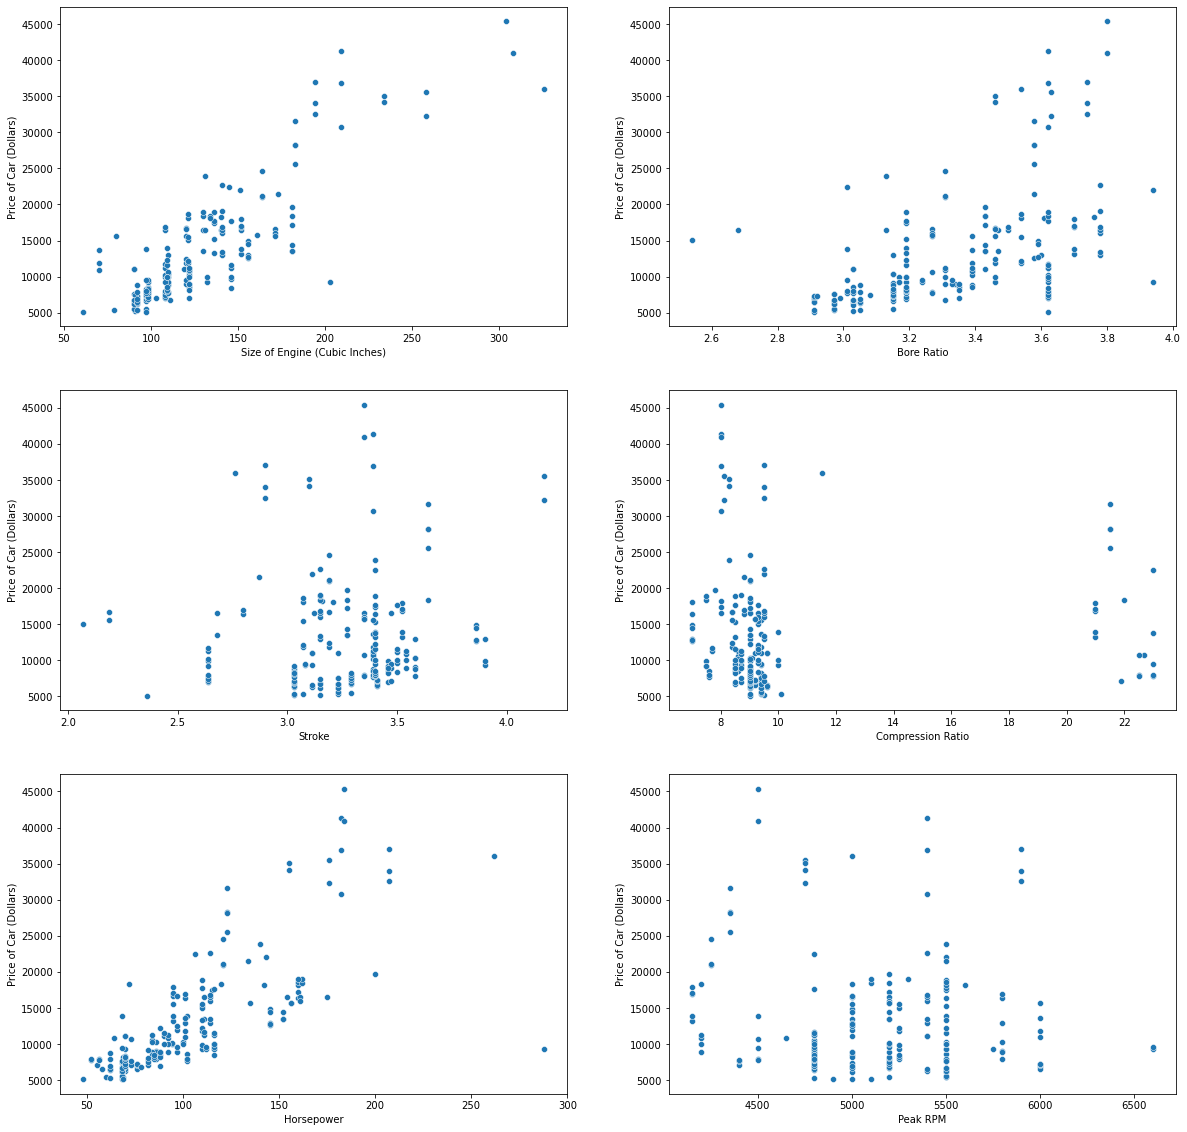

In [68]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = cardf, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = cardf, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = cardf, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = cardf, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = cardf, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = cardf, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')

plt.show()


#### Inference
- Size of Engine, bore ratio, and Horsepower has positive correlation with price.

## City Mileage & Highway Mileage

**single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.**

In [70]:
cardf['mileage'] = cardf['citympg']*0.55 + cardf['highwaympg']*0.45

**Let's see how price varies with mileage.**

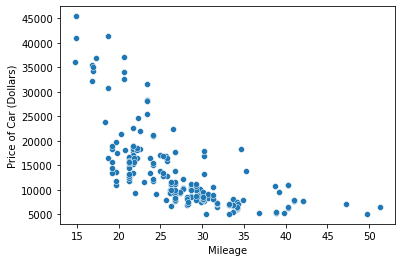

In [71]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = cardf)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference 
- Mileage has a negative correlation with price.

# Univariate Analysis

### Brand Category - Mileage

**It is expected that luxury brands don't care about mileage. Let's find out how price varies with brand category and mileage**

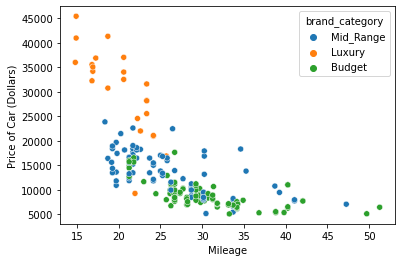

In [73]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = cardf)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Brand Category - Horsepower

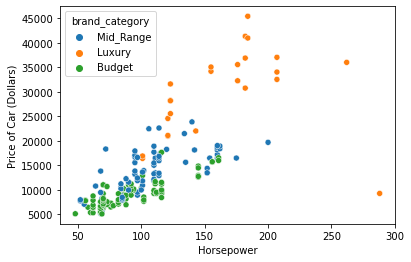

In [74]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = cardf)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Mileage - Fuel Type

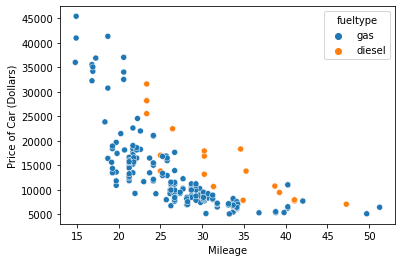

In [75]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = cardf)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Horsepower - Fuel Type

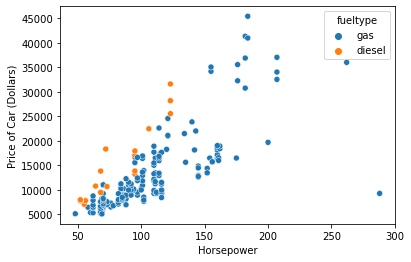

In [76]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = cardf)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

## Summary Univariate and Bivriate Analysis:
__From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.__ <br>
__The most important driver variable for prediction of price are:-__
1. Brand Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Wheelbase
7. Car Length
8. Car Width
9. Curb weight
10. Engine Type
11. Cylinder Number
12. Engine Size
13. Bore Ratio
14. Horsepower
15. Mileage


# Linear Regression Model

In [77]:
auto = cardf[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [78]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Mid_Range,19.80


## Visualizing the Data

### Visualizing Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1080x1080 with 0 Axes>

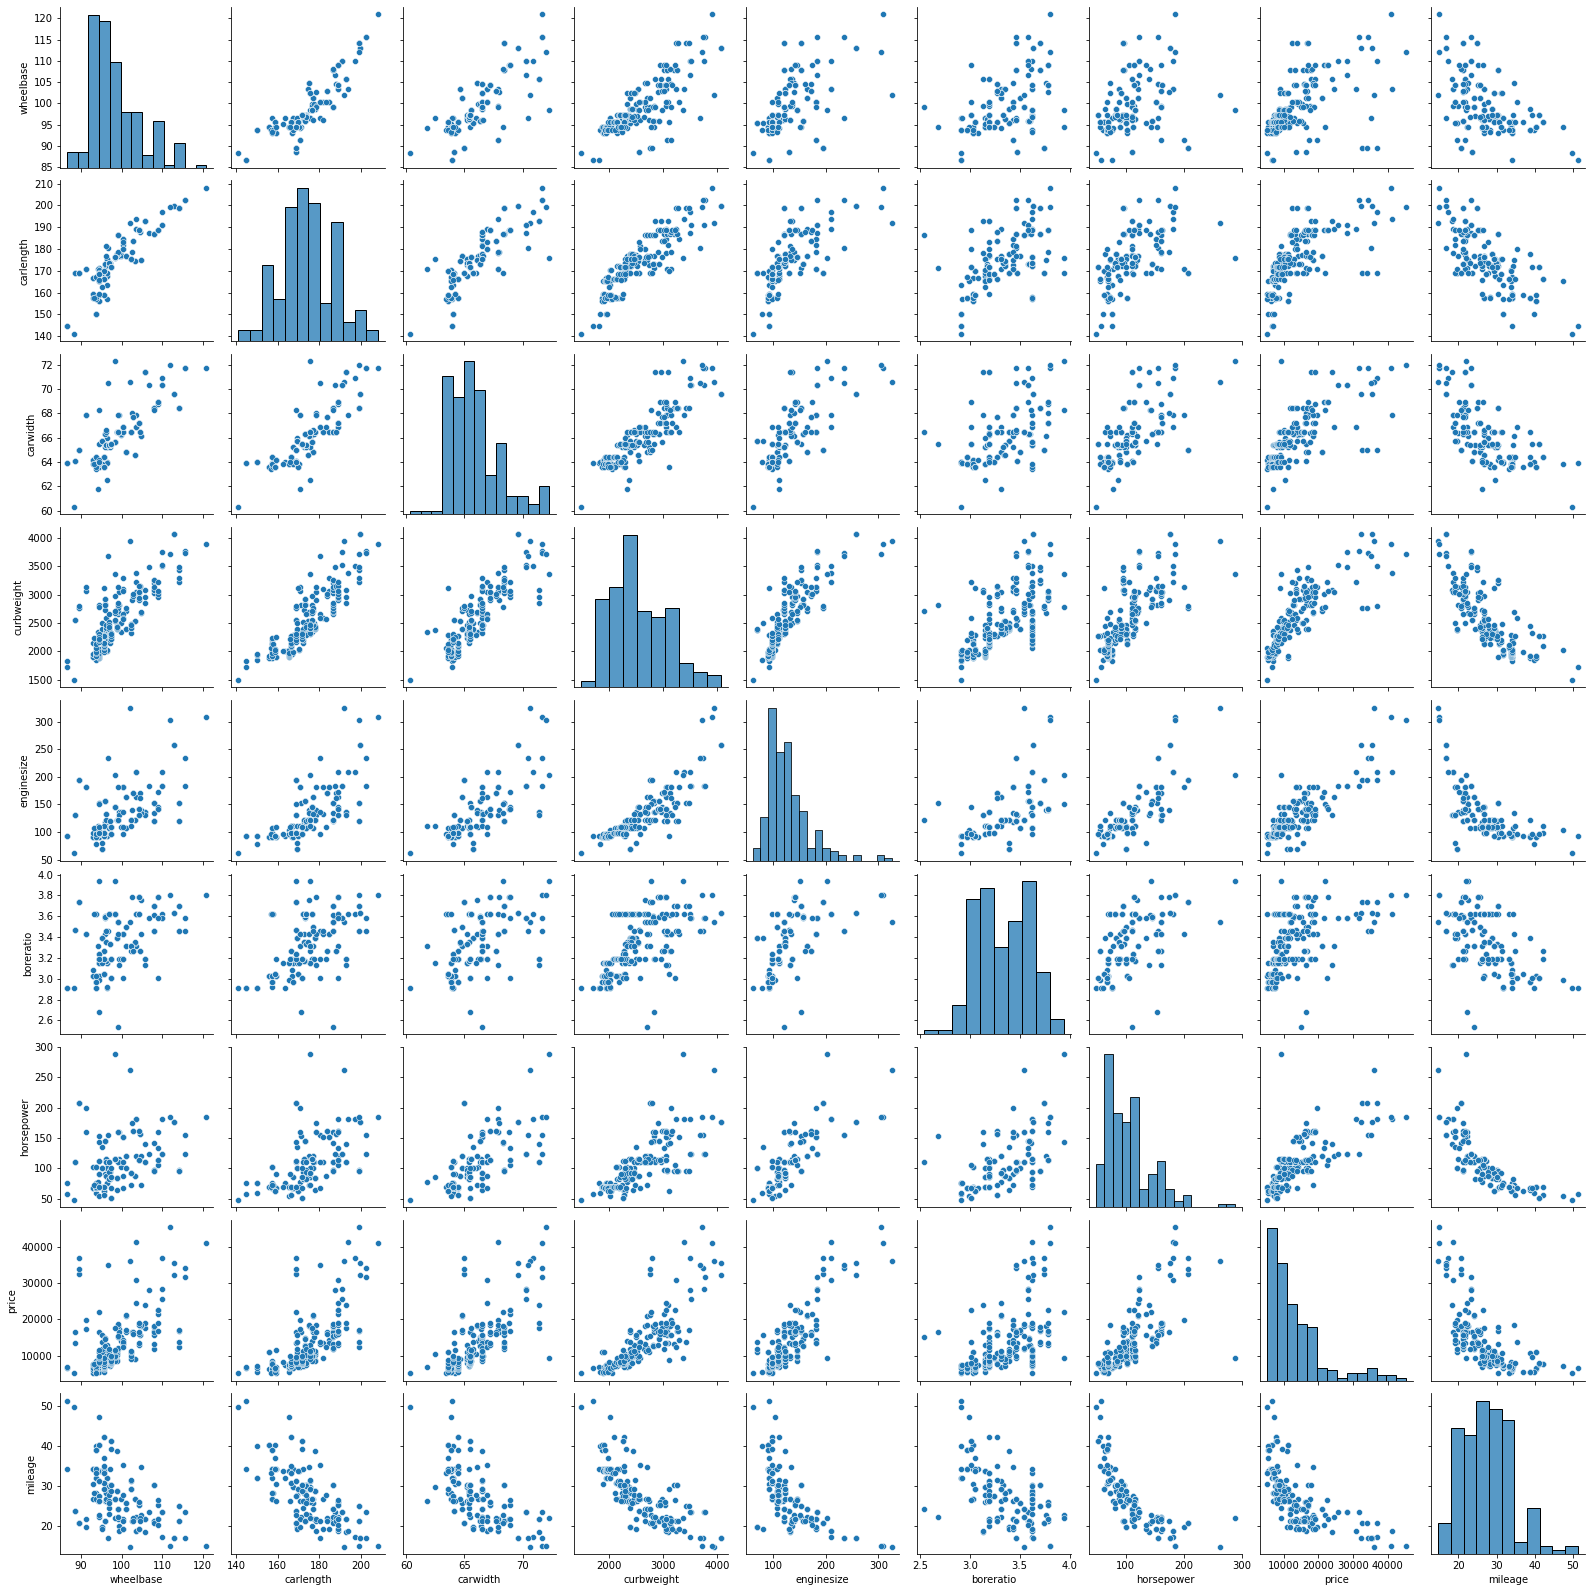

In [79]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

### Visualizing Categorical Variables

Let's make a boxplot for categorical variables.

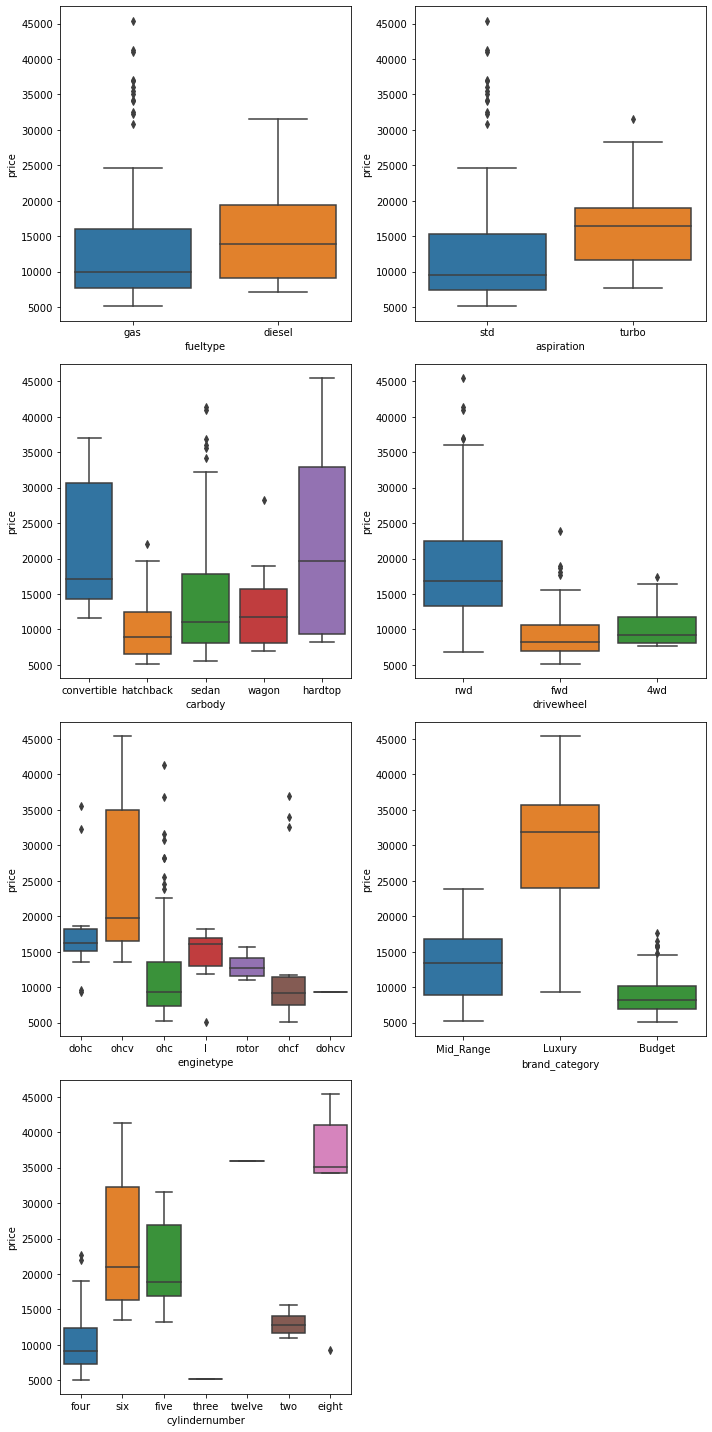

In [80]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()


## Data Preparation

### Dummy Variables

 Categorical Variables are converted into Numerical Variables with the help of Dummy Variable 

In [81]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
cyl_no

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
200,0,1,0,0,0,0
201,0,1,0,0,0,0
202,0,0,1,0,0,0
203,0,0,1,0,0,0


In [82]:
auto = pd.concat([auto, cyl_no], axis = 1)
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

In [83]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

## Model Building

### Splitting the Data into Training and Testing sets

In [84]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

 Use min-max scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [87]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [88]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [89]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.499278,0.228467,0.215586,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207406,0.165432,0.211112,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.195833,0.141642,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.306545,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Checking the correlation coefficients to see which variables are highly correlated**

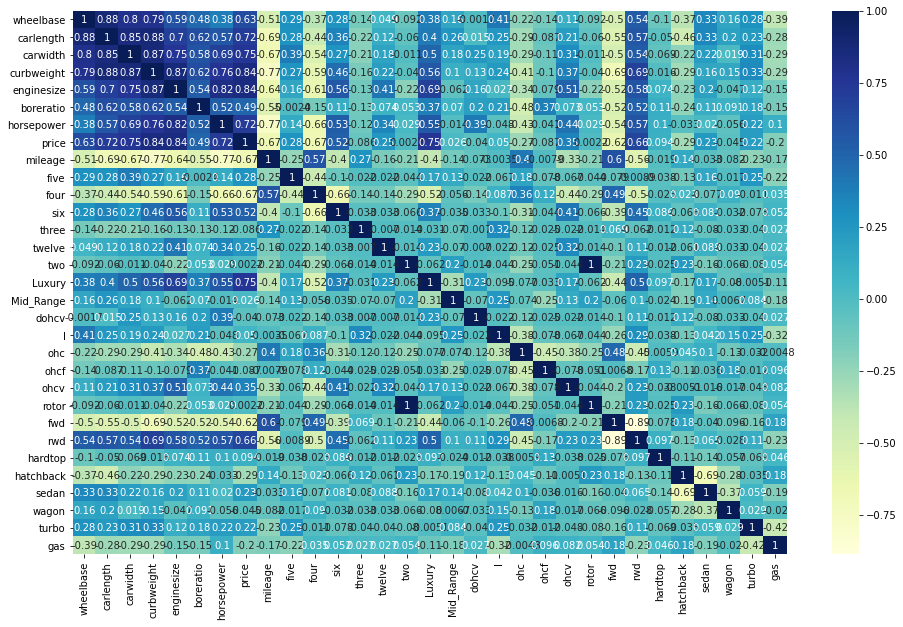

In [90]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Dividing into X and Y sets for the model building**

In [91]:
y_train = df_train.pop('price')
X_train = df_train

### RFE
**Recursive feature elimination**

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 20),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 6),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 18),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 10),
 ('rotor', False, 19),
 ('fwd', False, 15),
 ('rwd', False, 13),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 17),
 ('gas', False, 16)]

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [96]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,carwidth,curbweight,horsepower,mileage,twelve,Luxury,dohcv,hatchback,sedan,wagon
122,0.291667,0.272692,0.083333,0.530864,0,0,0,0,1,0
125,0.666667,0.500388,0.395833,0.213992,0,1,0,1,0,0
166,0.308333,0.314973,0.266667,0.344307,0,0,0,1,0,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.122085,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.354926,0.283333,0.311385,0,0,0,0,1,0
103,0.516667,0.609775,0.433333,0.189300,0,0,0,0,1,0
67,0.833333,0.786268,0.312500,0.234568,0,1,0,0,1,0
24,0.291667,0.185803,0.083333,0.530864,0,0,0,1,0,0


In [97]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [98]:
X_train_rfe

,const,carwidth,curbweight,horsepower,mileage,twelve,Luxury,dohcv,hatchback,sedan,wagon
122,1.0,0.291667,0.272692,0.083333,0.530864,0,0,0,0,1,0
125,1.0,0.666667,0.500388,0.395833,0.213992,0,1,0,1,0,0
166,1.0,0.308333,0.314973,0.266667,0.344307,0,0,0,1,0,0
1,1.0,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,1.0,0.575000,0.647401,0.475000,0.122085,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.283333,0.311385,0,0,0,0,1,0
103,1.0,0.516667,0.609775,0.433333,0.189300,0,0,0,0,1,0
67,1.0,0.833333,0.786268,0.312500,0.234568,0,1,0,0,1,0
24,1.0,0.291667,0.185803,0.083333,0.530864,0,0,0,1,0,0


In [100]:
# Running the linear model with Order Least Square
lr = sm.OLS(y_train,X_train_rfe).fit()   

In [101]:
#Summary of the linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           9.57e-68
Time:                        16:49:51   Log-Likelihood:                 201.71
No. Observations:                 143   AIC:                            -381.4
Df Residuals:                     132   BIC:                            -348.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0957      0.043     -2.203      0.0

In [102]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.45
2,curbweight,8.29
9,sedan,6.18
3,horsepower,5.90
8,hatchback,5.68
1,carwidth,5.17
4,mileage,3.75
10,wagon,3.60
7,dohcv,1.72
6,Luxury,1.68


In [104]:
# Dropping curbweight as p-value is high.
X_train_new1 = X_train_rfe.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Summary of the linear model
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     153.8
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           8.48e-66
Time:                        16:54:26   Log-Likelihood:                 194.05
No. Observations:                 143   AIC:                            -368.1
Df Residuals:                     133   BIC:                            -338.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0783      0.045     -1.724      0.0

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lr
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,70.68
8,sedan,6.18
7,hatchback,5.61
2,horsepower,5.14
3,mileage,3.66
9,wagon,3.49
1,carwidth,2.50
5,Luxury,1.58
6,dohcv,1.53
4,twelve,1.26


In [106]:
# This leaves mileage insignificant.

In [107]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lr = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     164.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):           1.94e-65
Time:                        16:57:50   Log-Likelihood:                 190.36
No. Observations:                 143   AIC:                            -362.7
Df Residuals:                     134   BIC:                            -336.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1293      0.042     -3.073      0.0

In [108]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lr
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.04
2,horsepower,5.06
3,mileage,3.64
1,carwidth,2.32
5,Luxury,1.57
6,dohcv,1.53
4,twelve,1.25
7,hatchback,1.24
8,wagon,1.14


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [111]:
y_train_price = lr.predict(X_train_lr)

Text(0.5, 0, 'Errors')

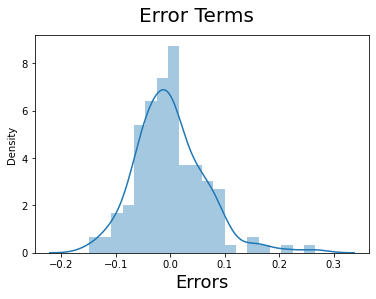

In [112]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions
Applying the scaling on the test sets

In [113]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [114]:
y_test = df_test.pop('price')
X_test = df_test

In [115]:
# Use the model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'mileage', 'twelve', 'Luxury','dohcv', 'hatchback', 'wagon']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [116]:
X_test_new

,const,carwidth,horsepower,mileage,twelve,Luxury,dohcv,hatchback,wagon
160,1.0,0.341667,0.091667,0.747599,0,0,0,0,0
186,1.0,0.433333,0.154167,0.421125,0,0,0,0,0
59,1.0,0.516667,0.150000,0.381344,0,0,0,1,0
165,1.0,0.308333,0.266667,0.344307,0,0,0,0,0
140,1.0,0.291667,0.104167,0.368999,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
28,1.0,0.358333,0.166667,0.326475,0,0,0,0,1
29,1.0,0.500000,0.404167,0.176955,0,0,0,1,0
182,1.0,0.433333,0.016667,0.720165,0,0,0,0,0
40,1.0,0.183333,0.158333,0.408779,0,0,0,0,0


In [117]:
# Making predictions
y_pred = lr.predict(X_test_new)

## Model Evaluation

In [118]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9120754705144959

Text(0, 0.5, 'y_pred')

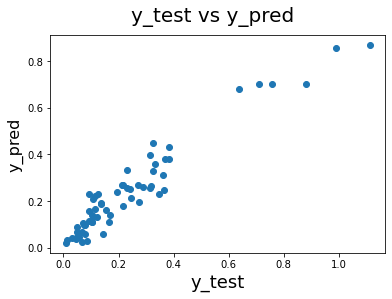

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

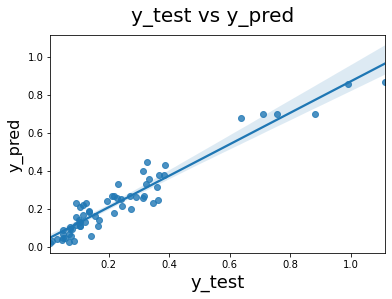

In [120]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)